In [3]:
from google.colab import files
uploaded = files.upload()

Saving mnist.csv to mnist (2).csv


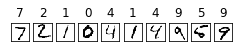

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import copy
import math

import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1



In [0]:
#라벨 벡터로
NumofLabel = 10
labelvector_train = []
labelvector_test = []
labeltemp = []

for i in range(6000):
  for j in range(NumofLabel):
    if list_label[i] == j:
      labeltemp.append(1)
    else:
      labeltemp.append(0)
  labelvector_train.append(copy.deepcopy(labeltemp))
  labeltemp.clear()
for i in range(4000):
  for j in range(NumofLabel):
    if list_label[i+6000] == j:
      labeltemp.append(1)
    else:
      labeltemp.append(0)
  labelvector_test.append(copy.deepcopy(labeltemp))
  labeltemp.clear()

In [0]:
#임의의 세타값 설정
thetaU=np.random.randn((int)(size_row*size_col/4), (int)(size_row*size_col+1))
thetaV=np.random.randn((int)(size_row*size_col/16), (int)(size_row*size_col/4+1))
thetaW=np.random.randn(NumofLabel, (int)(size_row*size_col/16+1))


In [0]:
#fully connected and sigmoid calculation
def compute_matrix (theta, data):
  z = np.dot(data,np.transpose(theta))
  sigz = []
  for i in range(len(z)):
    sigz.append(1.0/(1+np.exp(-z[i])))

  return sigz
 

In [0]:
#데이터 분류
list_train = []
for i in range(6000):
    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_vector = im_vector.tolist()
    im_vector.insert(0,1)
    list_train.append(copy.deepcopy(im_vector))

list_test = []
for i in range(4000):
    label       = list_label[6000+i]
    im_vector   = list_image[:, 6000+i]
    im_vector = im_vector.tolist()
    im_vector.insert(0,1)
    list_test.append(copy.deepcopy(im_vector))




In [0]:
#Compute prediction
def compute_prediction(thetaU, thetaV, thetaW, data):
  prediction = compute_matrix(thetaU, data)
  prediction.insert(0,1)
  y = copy.deepcopy(prediction)
  prediction = compute_matrix(thetaV, prediction)
  prediction.insert(0,1)
  z = copy.deepcopy(prediction)
  prediction = compute_matrix(thetaW, prediction)

  return prediction, z, y

  J = 0

#Get prediction list
def get_prediction_list(thetaU,thetaV, thetaW, data):
  prediction_list = []
  z_list = []
  y_list = []
  for i in range(len(data)):
    prediction, z, y = compute_prediction(thetaU,thetaV, thetaW, data[i])
    prediction_list.append(prediction)
    z_list.append(z)
    y_list.append(y)
  return prediction_list, z_list, y_list

# Objective Function
def compute_cost(thetaU,thetaV, thetaW, data, l):
  prediction, z, y = get_prediction_list(thetaU,thetaV, thetaW, data)
  m = len(prediction)
  J = 0
  for i in range(int(m)):
    for j in range(NumofLabel):
      J = J + (-l[i][j]*np.log(prediction[i][j]) - (1-l[i][j])*np.log(1-prediction[i][j]))
  J = J/m

  return J


def inv_sig(x):
  x = np.array(x)
  x = x.flatten()
  res = 0
  for i in x:
    res = res + i*(i-i)
  return res



In [0]:
#제일 큰 값 찾기

def find_big(list):
  big = list[0]
  result = 0
  for i in range(len(list)):
    if list[i] > big:
      big = list[i]
      result = i
  return result


In [0]:
# get theta, J_history, accuracy_history
def back_prop(thetaU,thetaV, thetaW, data, l, alpha, num):
  J_history=[]
  J_history.append(compute_cost(thetaU,thetaV, thetaW, data, l))
  accuracy_history = []
  U_history=[]
  V_history=[]
  W_history=[]
  for i in range(num):
    prediction, z, y = get_prediction_list(thetaU,thetaV, thetaW, data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l
    t1 = loss.T

    #thetaW 업데이트
    thetaW = thetaW - (alpha * np.dot(t1, z))
    W_history.append(thetaW)
    #thetaV 업데이트
    t = np.dot(thetaW.T, t1)
    t2 = inv_sig(z) * t
    t = np.dot(t2, y)
    thetaV = thetaV - (alpha * t[1:len(t)])
    V_history.append(copy.deepcopy(thetaV))
   
      
    #thetaU 업데이트
    t = np.dot(thetaV.T, t2[1:len(t2)])
    t = inv_sig(y) * t
    t = np.dot(t, data)
    thetaU = thetaU - (alpha * t[1:len(t)])
    U_history.append(copy.deepcopy(thetaU))

    J_history.append(copy.deepcopy(compute_cost(thetaU, thetaV, thetaW, data, l)))
    temp = 0 
    for j in range(len(prediction)):
      if l[j][find_big(prediction[j])] == 1:
        temp = temp + 1
    accuracy_history.append(copy.deepcopy(temp))


  return thetaW, thetaV, thetaU, J_history, U_history, V_history, W_history


In [162]:
alpha = [0.01, 0.0003]

thetaW, thetaV, thetaU, J_history0 ,U, V, W = back_prop(thetaU,thetaV, thetaW, list_train, labelvector_train, alpha[0], 3)
#thetaW, thetaV, thetaU, J_history1 ,accuracy_history1 = back_prop(thetaU,thetaV, thetaW, list_train, labelvector_train, alpha[1], 10000)

#J_history = J_history0+J_history1
#accuracy_history = accuracy_history0+accuracy_history1

#for i in range(len(accaracy_history)):
#  accaracy_history


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


#1. Plot the training error

[nan, nan, nan, nan]


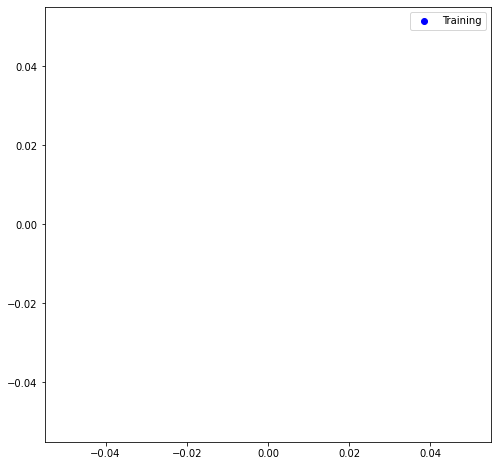

In [160]:
#Plot the training error
print(J_history0)
plt.figure(figsize=(8, 8))
plt.scatter(range(4), J_history0, c='blue', label = "Training")
plt.legend(loc='upper right')
plt.show()







#2. Plot the training accuracy

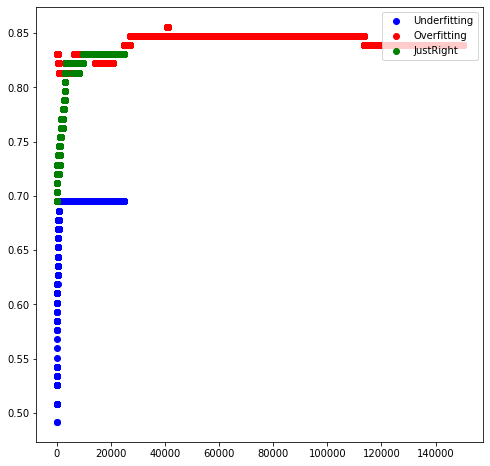

In [0]:
#Plot the training accuracy

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), accuracy_rate0, c='blue', label = "Train")
plt.scatter(range(150001), accuracy_rate2, c='red', label = "Test")

plt.legend(loc='upper right')
plt.show()

#3. Final training accuracy

In [0]:
#Write down the final training accuracy
print()
print()

83.89830508474576
83.05084745762711
69.49152542372882


#4. Plot the classification example

In [0]:

f1 = plt.figure(1)

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(i)
    plt.imshow(image_avg[i], cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

    
f1 = plt.figure(1)

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(i)
    plt.imshow(image_avg[i], cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()